In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469   

In [ ]:

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','Age','DiabetesPedigreeFunction']
zero_counts = (df[columns_to_check] == 0).sum()


print("Number of zero values in each column:")
print(zero_counts)

# if distribution symmetric - mean , skewed-median , count - mode , cateogrical
# - mode

#here i want to fill zero values with something as i want good accuracy


Number of zero values in each column:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
Pregnancies                 111
Age                           0
DiabetesPedigreeFunction      0
dtype: int64


In [ ]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','Age','DiabetesPedigreeFunction']
skew_value = df[columns].skew()
print(f'Skewness: {skew_value}')

# Symmetric Distribution: Skewness ≈ 0.
# Positive Skew: Skewness > 0 (tail on the right).
# Negative Skew: Skewness < 0 (tail on the left).

# Positive Skew: Mean > Median.
# Negative Skew: Mean < Median.



Skewness: Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
Pregnancies                 0.901674
Age                         1.129597
DiabetesPedigreeFunction    1.919911
dtype: float64


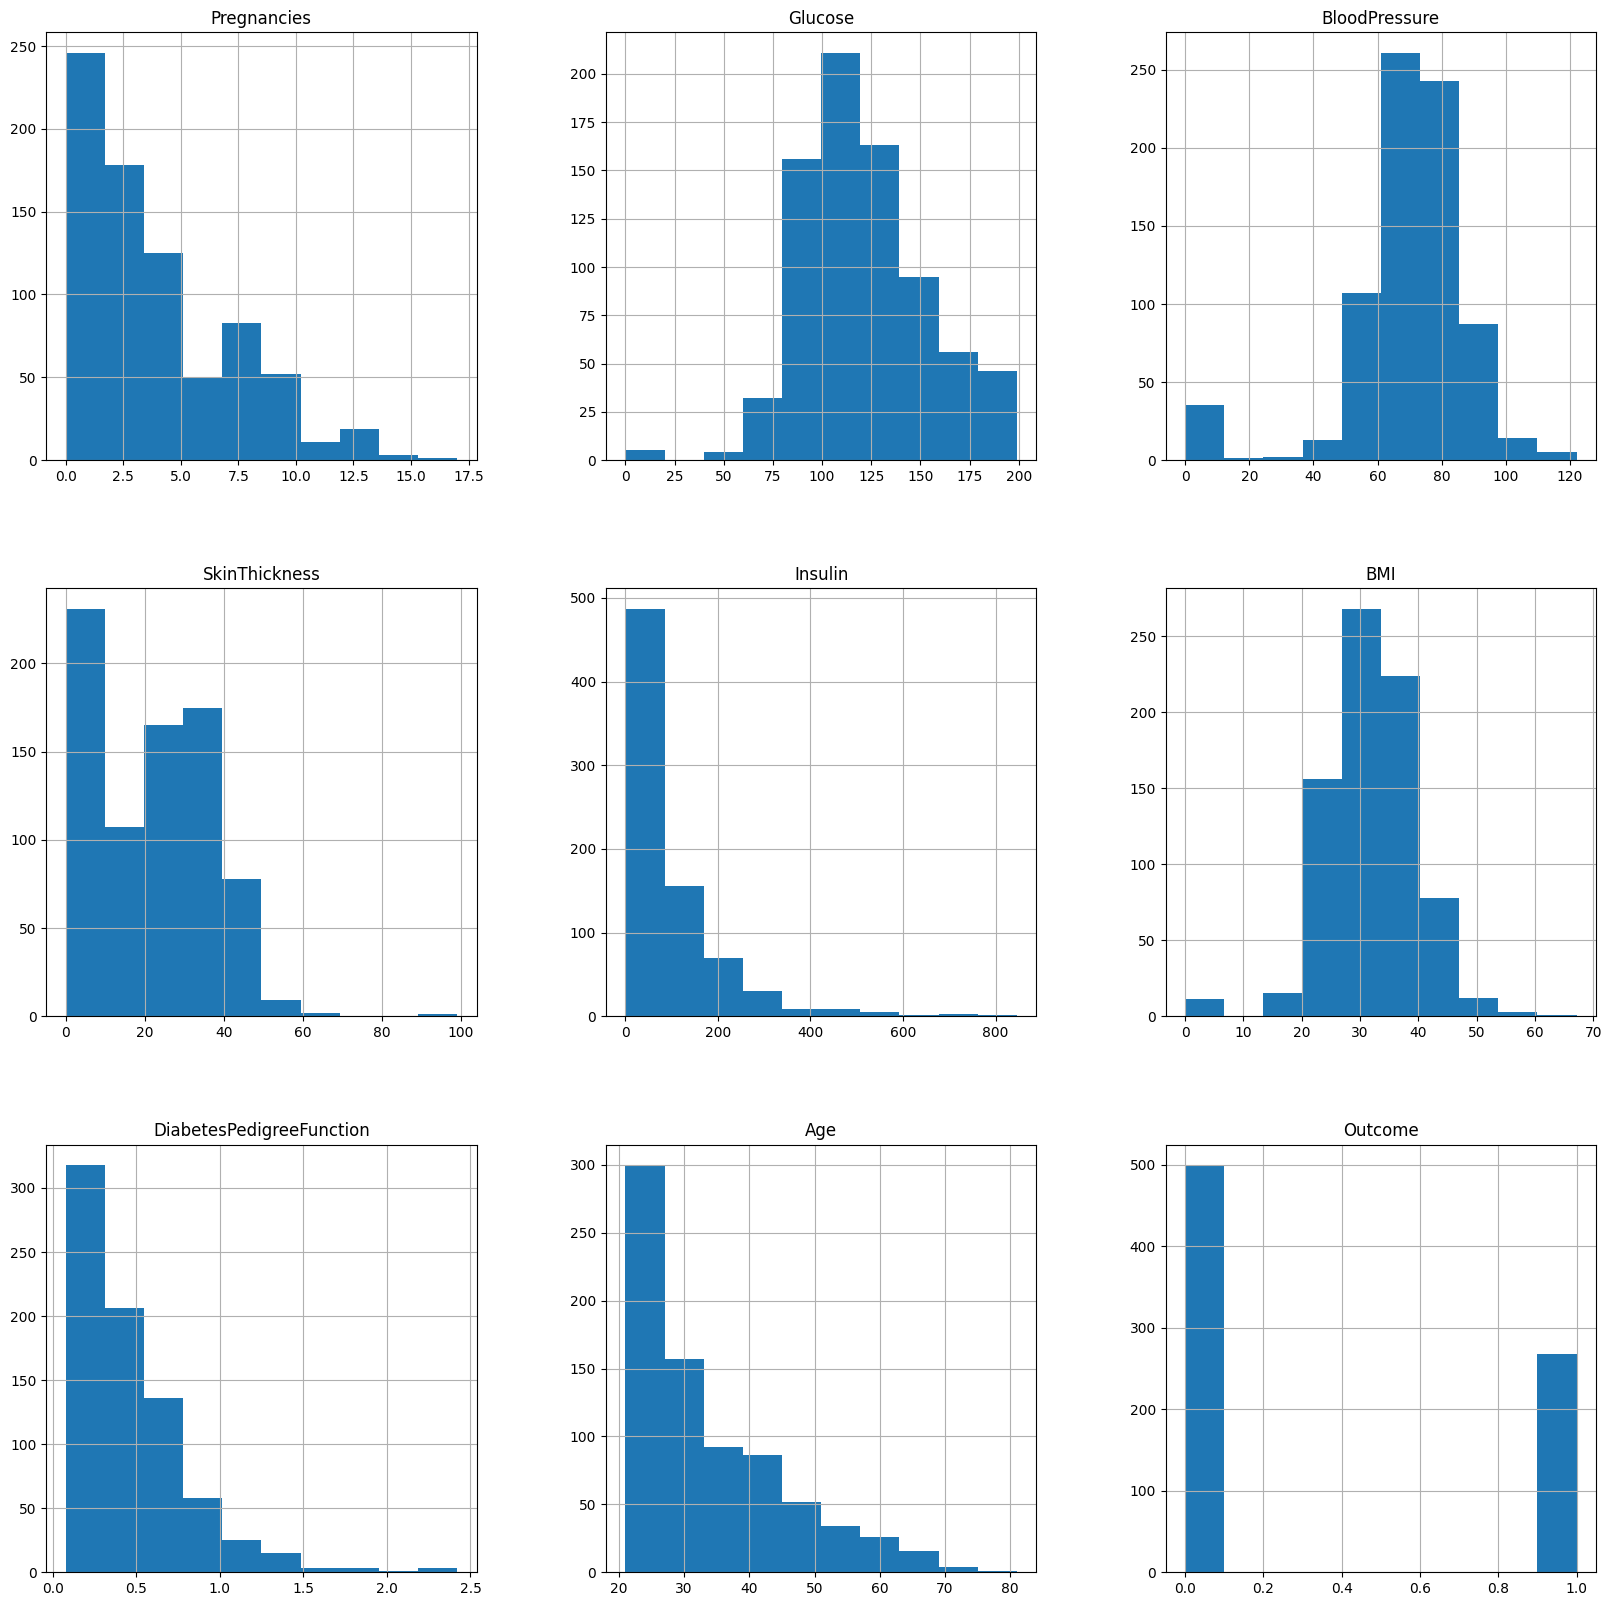

In [ ]:
p = df.hist(figsize=(20, 20))

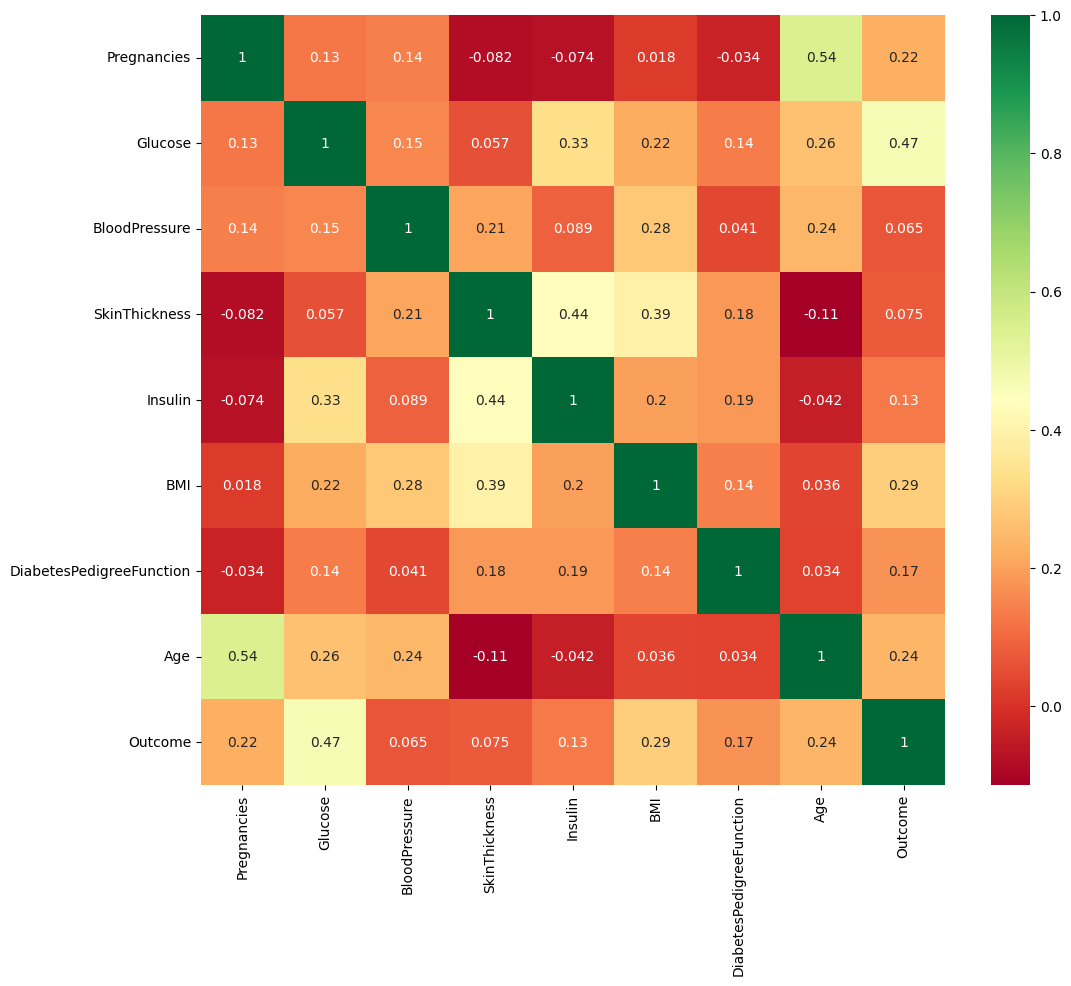

In [ ]:
plt.figure(figsize=(12, 10))
# Using seaborn to create a heatmap for the correlation matrix
p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

<ipython-input-9-8616cf399ff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')
<ipython-input-9-8616cf399ff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')
<ipython-input-9-8616cf399ff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')
<ipython-input-9-8616cf399ff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

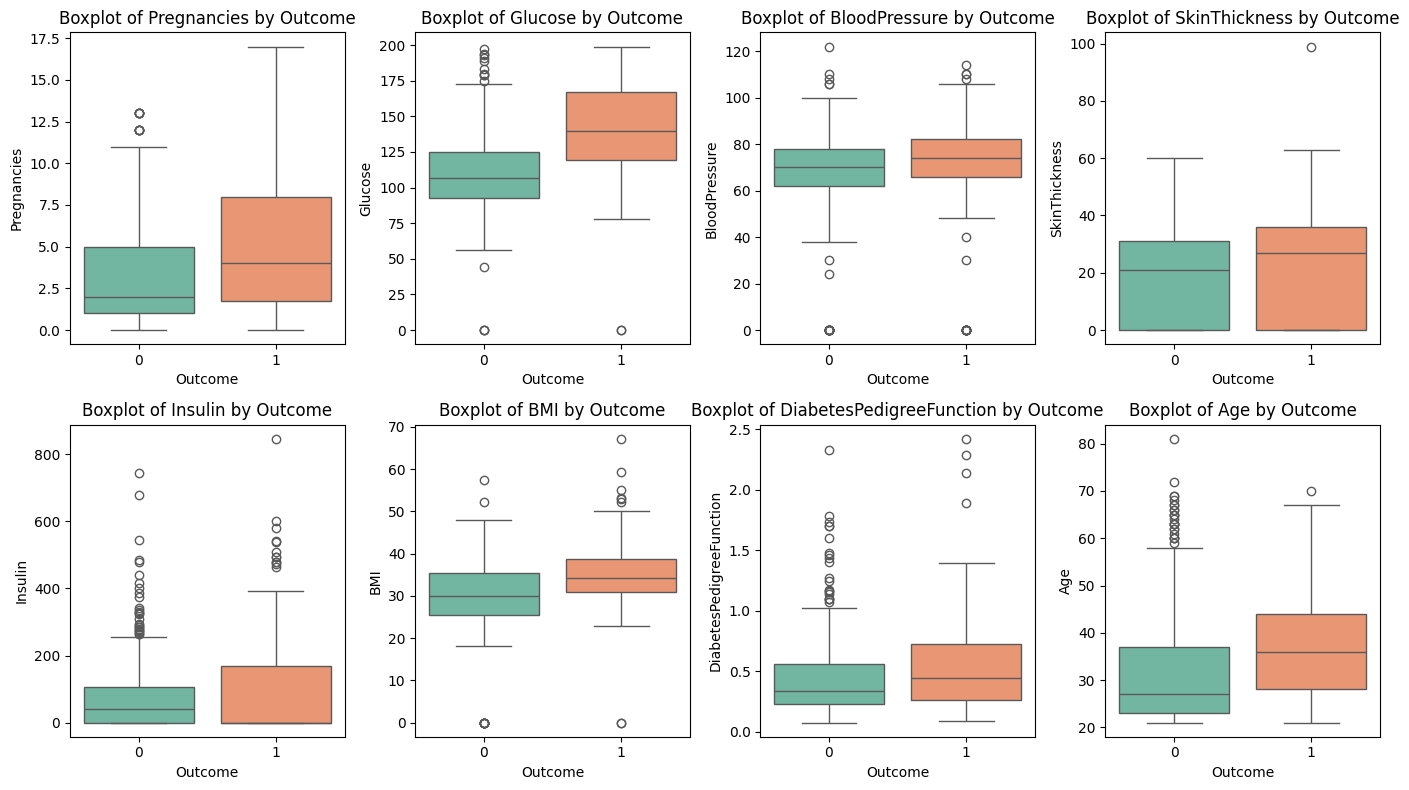

In [ ]:
# Boxplot for numeric features grouped by Outcome
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot of {feature} by Outcome')
    plt.tight_layout()

plt.show()

<ipython-input-10-cd7711adc480>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


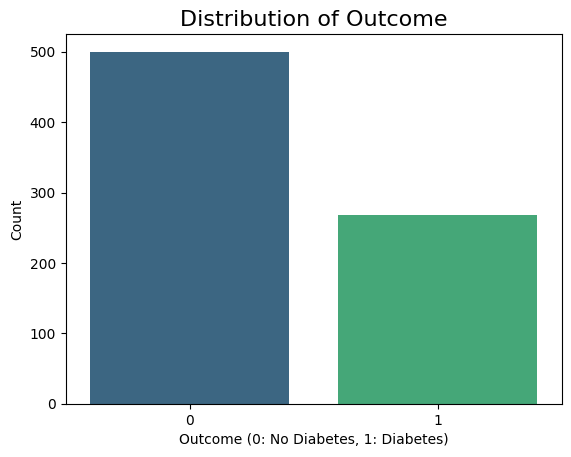

In [ ]:
# Distribution of Outcome (class balance)
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Outcome', fontsize=16)
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target
X = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure', 'SkinThickness']]
# X = df[['Glucose', 'BMI', 'Age', 'Pregnancies']] #feature engineered  columns
y = df['Outcome']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values (replace 0s with mean)
imputer = SimpleImputer(missing_values=0, strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
model = SVC(kernel='rbf', random_state=42)  # 'rbf' is the default kernel; you can experiment with others
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from xgboost import XGBClassifier
# Initialize and train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Dataset source

In [ ]:
# link-https://www.kaggle.com/datasets/saurabh00007/diabetescsv

Report on the project

In [ ]:
'''
Diabetes Prediction Using Machine Learning This project analyzes the Diabetes Dataset to predict the likelihood of diabetes in patients using machine learning models. The dataset contains medical diagnostic data such as glucose levels, BMI, insulin levels, and more.

Key Features: Exploratory Data Analysis (EDA):
Summary statistics and null value checks. Skewness analysis to handle zero and missing values effectively. Heatmaps and boxplots to explore relationships between features and outcomes.
Data Preprocessing: Handling missing values by replacing zeros with the mean of each column. Standardizing numerical features for improved model performance.

Machine Learning Models: Logistic Regression: Simple yet effective baseline model. Support Vector Machine (SVM): Utilizes the RBF kernel for enhanced accuracy. XGBoost Classifier: A high-performance gradient-boosting algorithm.

Performance Evaluation: Accuracy, classification reports, and other metrics to assess model performance. Dependencies: Python libraries: pandas, numpy, matplotlib, seaborn, scikit-learn, xgboost

Future Goals: In future i aim to include AUC-ROC metric evaluation also and involve Gan's or smote to balance the datasets and thus attain balanced datasets for proper classification metric scores
'''